## Importing The Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# BUSINESS PROBLEM:
A Retail store is required to analyze the day-to-day transactions and keep a track of its customers 
spread across various locations along with their purchases/returns across various categories. 
Create a report and display the below calculated metrics, reports and inferences.

In [4]:
customer_1=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv")
transaction_1=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
product_heirarchy_1=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")

In [5]:
customer_1.sample(5)

,customer_Id,DOB,Gender,city_code
4848,272177,05-09-1989,F,4.0
2891,270585,23-10-1981,M,4.0
3595,268683,03-10-1984,M,8.0
5273,269300,21-06-1991,M,7.0
528,267778,11-03-1972,F,7.0


In [6]:
customer_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [7]:
transaction_1.sample(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
20821,44675599618,267925,14-05-2011,12,5,2,319,66.990,704.990,e-Shop
14889,6243938180,268179,28-02-2012,12,5,5,863,453.075,4768.075,Flagship store
1364,70631653733,271888,18-12-2013,7,5,2,912,191.520,2015.520,e-Shop
18251,26485902398,270437,18-09-2011,11,5,5,272,142.800,1502.800,TeleShop
13055,78377303011,274535,24-05-2012,1,1,1,174,18.270,192.270,e-Shop


In [8]:
transaction_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [9]:
product_heirarchy_1.sample(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
13,5,Books,7,Fiction
1,1,Clothing,1,Women
17,5,Books,3,Comics
6,3,Electronics,4,Mobiles
22,6,Home and kitchen,12,Tools


In [10]:
product_heirarchy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


## Data Preparation

In [11]:
#converting dates from object to datetime

#customer_1
customer_1.DOB=pd.to_datetime(customer_1.DOB, format='%d-%m-%Y')

#transaction_1
transaction_1.tran_date=transaction_1.tran_date.str.replace('/','-')
transaction_1.tran_date=pd.to_datetime(transaction_1.tran_date, format='%d-%m-%Y')

In [12]:
customer_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [13]:
transaction_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 
Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [14]:
merge_1=pd.merge(left=customer_1,right=transaction_1,left_on='customer_Id',right_on='cust_id',how='inner')
merge_1

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop
1,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store
3,268408,1970-01-02,M,4.0,28810141075,268408,2013-09-02,10,6,2,813,170.730,1796.730,TeleShop
4,268408,1970-01-02,M,4.0,64633435931,268408,2013-05-06,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR
23050,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR
23051,274308,1992-12-29,F,5.0,57358822237,274308,2012-09-05,1,2,4,876,367.920,3871.920,e-Shop


In [15]:
customer_final=pd.merge(left=merge_1,right=product_heirarchy_1,left_on=['prod_cat_code','prod_subcat_code'],
                 right_on=['prod_cat_code','prod_sub_cat_code'])
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-12-09,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


### 2.a Get the column names and their corresponding data types

In [16]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23053 non-null  int64         
 1   DOB                23053 non-null  datetime64[ns]
 2   Gender             23044 non-null  object        
 3   city_code          23045 non-null  float64       
 4   transaction_id     23053 non-null  int64         
 5   cust_id            23053 non-null  int64         
 6   tran_date          23053 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  int64         
 8   prod_cat_code      23053 non-null  int64         
 9   Qty                23053 non-null  int64         
 10  Rate               23053 non-null  int64         
 11  Tax                23053 non-null  float64       
 12  total_amt          23053 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

### 2.b Top/Bottom 10 observations.

In [17]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-12-09,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,1970-02-01,M,4.0,78357345891,274630,2012-04-11,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-02-01,M,4.0,23916816961,273541,2013-02-09,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-03-09,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-01-11,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [18]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-06-10,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


### 2.c "Five-number summary"for continuous variables

In [19]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [20]:
customer_final.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_Id,23053.0,271021.746497,266783.0,268935.0,270980.0,273114.0,275265.0,2431.692059
DOB,23053,1981-07-14 21:22:57.816336256,1970-01-02 00:00:00,1975-09-26 00:00:00,1981-06-16 00:00:00,1987-06-05 00:00:00,1992-12-29 00:00:00,NaN
city_code,23045.0,5.482534,1.0,3.0,5.0,8.0,10.0,2.863499
transaction_id,23053.0,50073480358.450485,3268991.0,24938639453.0,50093131361.0,75329995679.0,99987549630.0,28981936061.995945
cust_id,23053.0,271021.746497,266783.0,268935.0,270980.0,273114.0,275265.0,2431.692059
tran_date,23053,2012-08-09 05:21:26.617793792,2011-01-25 00:00:00,2011-11-03 00:00:00,2012-08-11 00:00:00,2013-05-17 00:00:00,2014-02-28 00:00:00,NaN
prod_subcat_code,23053.0,6.149091,1.0,3.0,5.0,10.0,12.0,3.726372
prod_cat_code,23053.0,3.763632,1.0,2.0,4.0,5.0,6.0,1.677016
Qty,23053.0,2.432395,-5.0,1.0,3.0,4.0,5.0,2.268406
Rate,23053.0,636.369713,-1499.0,312.0,710.0,1109.0,1500.0,622.363498


### 2.d Frequency tables for all the categorical variables.


In [21]:
table=['Gender','city_code','prod_cat','prod_subcat','Store_type']
for var in table:
    print(customer_final.loc[:,var].value_counts().sort_index())
    print("============================")

Gender
F    11233
M    11811
Name: count, dtype: int64
city_code
1.0     2258
2.0     2270
3.0     2411
4.0     2422
5.0     2360
6.0     2127
7.0     2356
8.0     2330
9.0     2178
10.0    2333
Name: count, dtype: int64
prod_cat
Bags                1998
Books               6069
Clothing            2960
Electronics         4898
Footwear            2999
Home and kitchen    4129
Name: count, dtype: int64
prod_subcat
Academic                967
Audio and video         952
Bath                   1023
Cameras                 985
Children               1035
Comics                 1031
Computers               958
DIY                     989
Fiction                1043
Furnishing             1007
Kids                   1997
Kitchen                1037
Mens                   2912
Mobiles                1031
Non-Fiction            1004
Personal Appliances     972
Tools                  1062
Women                  3048
Name: count, dtype: int64
Store_type
Flagship store    4577
MBR               

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

<Axes: xlabel='Tax', ylabel='Count'>

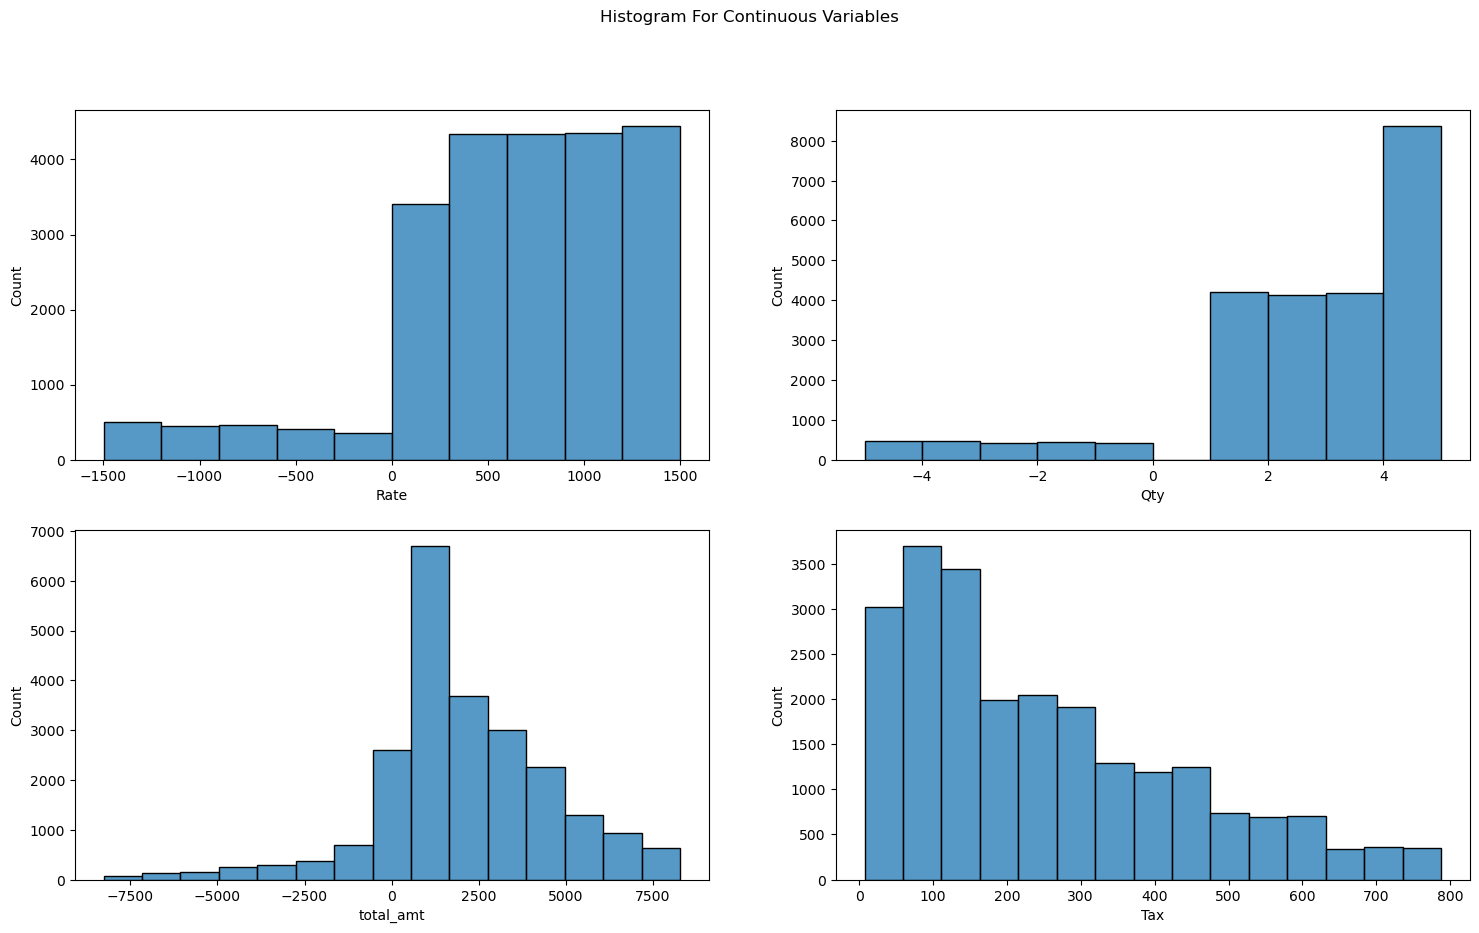

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Histogram For Continuous Variables')

sns.histplot(ax=axes[0, 0], data=customer_final, x='Rate',bins=10)
sns.histplot(ax=axes[0, 1], data=customer_final, x='Qty',bins=10)
sns.histplot(ax=axes[1, 0], data=customer_final, x='total_amt',bins=15)
sns.histplot(ax=axes[1, 1], data=customer_final, x='Tax',bins=15)

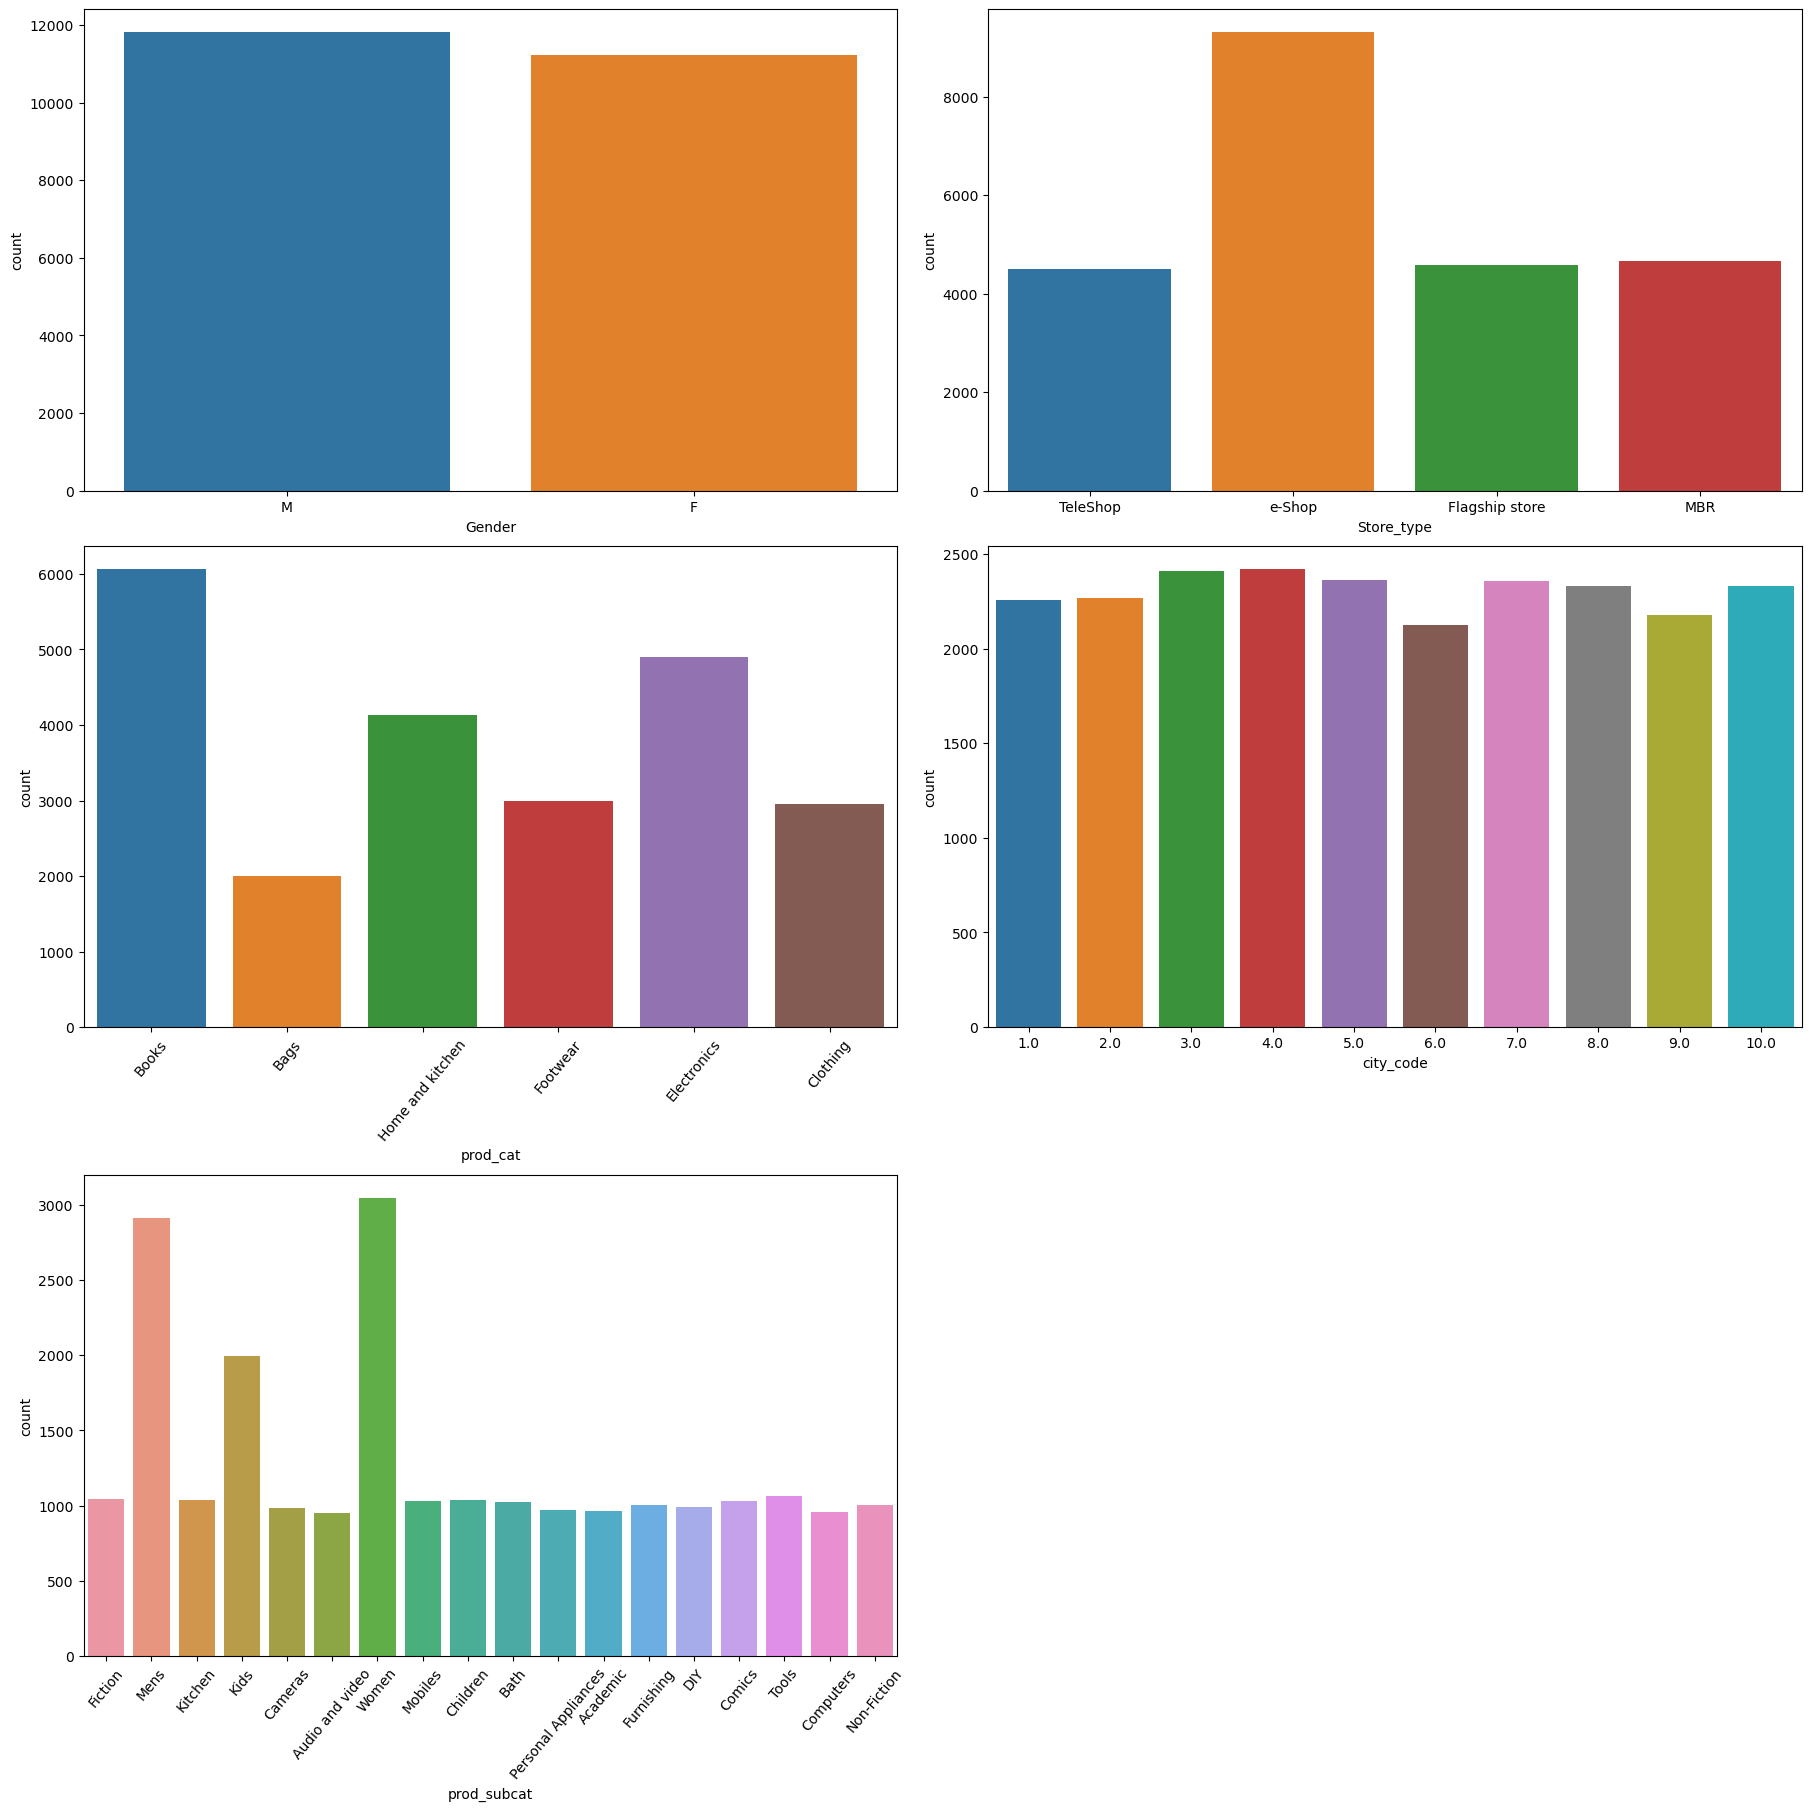

In [23]:
plt.figure(figsize = (18,18),layout ='constrained')

plt.subplot(3,2,1)
sns.countplot(data = customer_final,x='Gender')

plt.subplot(3,2,2)
sns.countplot(data = customer_final,x='Store_type')

plt.subplot(3,2,3)
sns.countplot(data = customer_final,x='prod_cat')
plt.xticks(rotation=50)

plt.subplot(3,2,4)
sns.countplot(data = customer_final,x='city_code')

plt.subplot(3,2,5)
sns.countplot(data = customer_final,x='prod_subcat')
plt.xticks(rotation=50)


plt.show()

### 4. Calculate the following information using the merged dataset :

a. Time period of the available transaction data

In [24]:
print ('Time period of the available transaction data is from ',customer_final.tran_date.min(),' to '
       ,customer_final.tran_date.max())
print ('The number of Days:',customer_final.tran_date.max()-customer_final.tran_date.min())



Time period of the available transaction data is from  2011-01-25 00:00:00  to  2014-02-28 00:00:00
The number of Days: 1130 days 00:00:00


b. Count of transactions where the total amount of transaction was negative

In [25]:
negative_transactions=customer_final.Rate<0
negative_transactions.sum()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

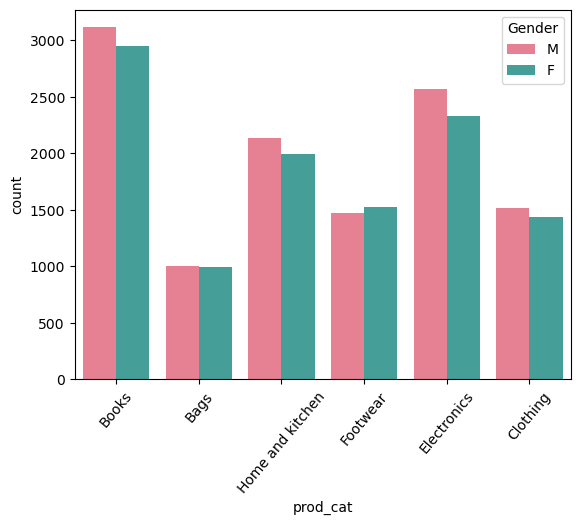

In [26]:
sns.countplot(data=customer_final,x='prod_cat',hue='Gender',palette='husl')
plt.xticks(rotation=50)
plt.show()

In [27]:
prod_category=pd.pivot_table(data=customer_final,index='prod_cat',columns='Gender',values='customer_Id',aggfunc='count')
prod_category

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


Book and Electronics are the most popular product categories among females vs male customers.

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [28]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [29]:
gender_combine=pd.pivot_table(data=customer_final,index='city_code',values='Gender',aggfunc='count')
gender_combine.sort_values(by='Gender',ascending=False)

,Gender
city_code,
4.0,2422
3.0,2411
5.0,2360
7.0,2356
10.0,2333
8.0,2330
2.0,2265
1.0,2258
9.0,2178


<Axes: xlabel='city_code'>

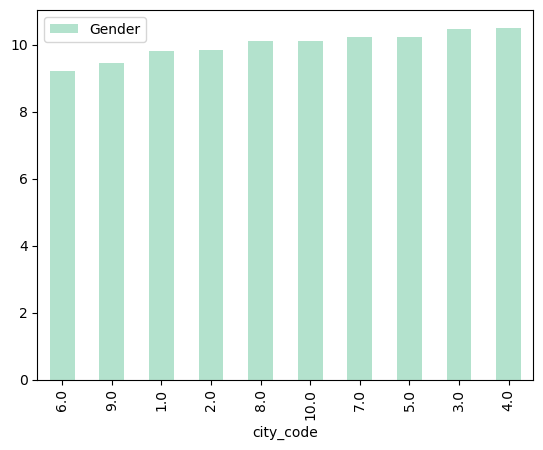

In [30]:
gender_combine=pd.pivot_table(data=customer_final,index='city_code',values='Gender',aggfunc='count')
gender_combine_graph=(gender_combine/customer_final.Gender.count())*100
gender_combine_graph.sort_values(by='Gender').plot(kind='bar',colormap='Pastel2')

City code: 4 has the maximum customer

<Axes: xlabel='city_code'>

<Figure size 1000x2000 with 0 Axes>

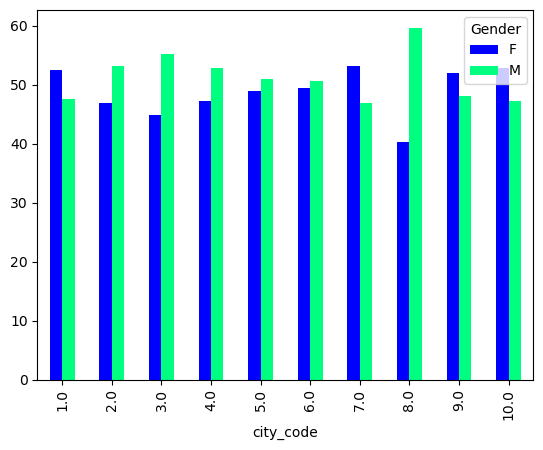

In [31]:
plt.figure(figsize=(10,20))
gender_split=pd.pivot_table(data=customer_final,index='city_code',columns='Gender',values='customer_Id',aggfunc='count')
gender_split_graph=(gender_split.div(gender_split.sum(axis=1),axis=0))*100
gender_split_graph.plot(kind="bar",colormap='winter')

City code: 8 has the maximum male customers

City code: 7 has the maximum female customers

### 7. Which store type sells the maximum products by value and by quantity?

In [32]:
pivot_req=customer_final.pivot_table(index='Store_type',values=['total_amt','Qty'],
                                     aggfunc=np.sum).sort_values(by='total_amt',ascending=False)
pivot_req.round()

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.0
Flagship store,11133,9715688.0
MBR,11194,9674486.0
TeleShop,10984,9364781.0


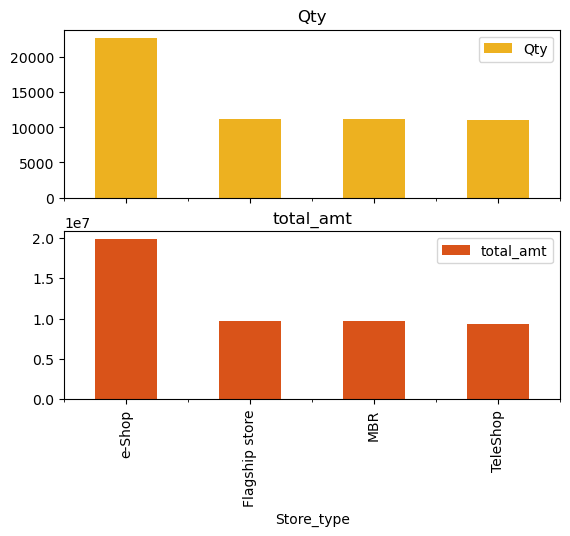

In [33]:
pivot_graph=pivot_req.round()
pivot_graph.plot(kind='bar',subplots=True,color=['#EDB120','#D95319'])
plt.show()

The store type that sells the maximum products by value and by quantity is e-Shop

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [34]:
flagship_total=customer_final.pivot_table(index='Store_type',columns='prod_cat', values="total_amt",aggfunc=np.sum)
flagship_total

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.835,2488205.850,1194423.230,2215136.040,1234806.560,1712567.675
MBR,848678.675,2496039.195,1287686.335,2107514.565,1112163.715,1822403.570
TeleShop,789181.055,2545005.060,1241834.360,1973338.835,1235719.290,1579702.475
e-Shop,1616300.075,5293443.935,2527193.565,4426474.195,2637084.710,3324319.570


In [35]:
flagship_total.iloc[0,2:4]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [36]:
flagship_total.iloc[0,2:4].sum()

3409559.27

<Axes: xlabel='prod_cat'>

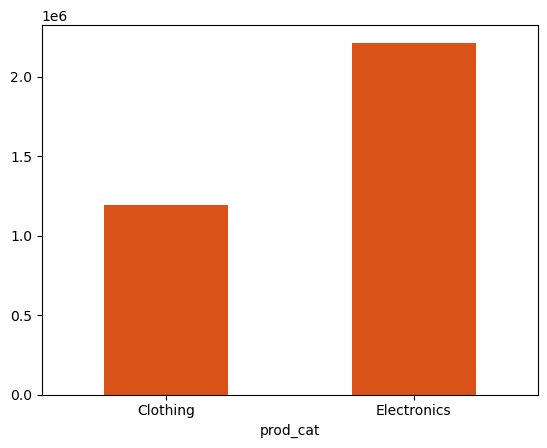

In [37]:
flagship_total.iloc[0,2:4].plot(kind='bar',rot=0,color='#D95319')

The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores:3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [38]:
electronics=customer_final[(customer_final.prod_cat=='Electronics') & (customer_final.Gender=='M')]
electronics.total_amt.sum()

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [39]:
positive_transaction=customer_final[customer_final.total_amt>0]
positive_transaction.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction


In [40]:
group_id=positive_transaction.pivot_table(index='customer_Id',values='transaction_id',aggfunc='count')
group_id[group_id.loc[:,'transaction_id']>10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


There are 6 customers having more than 10 unique transactions.

### 11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?

In [41]:
#calculating age

In [44]:
age=customer_final.pivot_table(index='customer_Id',values=['DOB','tran_date'],aggfunc='max')
age

,DOB,tran_date
customer_Id,,
266783,1974-05-01,2013-02-20
266784,1991-12-13,2012-12-04
266785,1985-06-29,2013-08-01
266788,1972-03-20,2013-02-12
266794,1971-02-28,2014-02-12
...,...,...
275257,1987-10-25,2013-09-03
275261,1973-03-21,2013-10-05
275262,1973-06-06,2012-02-29


In [45]:
age['Age']=(age.tran_date-age.DOB)
age['Age']=age.Age.apply(lambda x: x.days/365.25)
age

,DOB,tran_date,Age
customer_Id,,,
266783,1974-05-01,2013-02-20,38.809035
266784,1991-12-13,2012-12-04,20.977413
266785,1985-06-29,2013-08-01,28.090349
266788,1972-03-20,2013-02-12,40.900753
266794,1971-02-28,2014-02-12,42.956879
...,...,...,...
275257,1987-10-25,2013-09-03,25.859001
275261,1973-03-21,2013-10-05,40.542094
275262,1973-06-06,2012-02-29,38.732375


In [46]:
req_age=age[(age.Age>=25)&(age.Age<=35)]
req_age

,DOB,tran_date,Age
customer_Id,,,
266785,1985-06-29,2013-08-01,28.090349
266804,1979-07-14,2013-06-08,33.902806
266809,1980-02-26,2013-07-16,33.385352
266810,1981-08-16,2013-02-26,31.531828
266812,1982-11-26,2011-09-13,28.796715
...,...,...,...
275244,1979-02-01,2013-10-27,34.735113
275245,1981-01-07,2013-07-18,32.525667
275247,1984-10-19,2013-09-25,28.933607


In [49]:
req_custID=req_age.index
req_custID

Index([266785, 266804, 266809, 266810, 266812, 266813, 266814, 266817, 266818,
       266819,
       ...
       275220, 275221, 275224, 275231, 275237, 275244, 275245, 275247, 275249,
       275257],
      dtype='int64', name='customer_Id', length=2436)

In [51]:
new_data=customer_final[customer_final.customer_Id.isin(req_custID)]
new_data

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
325,269939,1977-01-27,M,10.0,35250168017,269939,2011-02-22,7,5,3,128,40.320,424.320,e-Shop,Books,7,Fiction
326,269912,1977-02-18,M,2.0,53750330366,269912,2012-01-18,7,5,5,1233,647.325,6812.325,e-Shop,Books,7,Fiction
330,274436,1977-03-29,M,5.0,86858697315,274436,2011-03-07,7,5,5,868,455.700,4795.700,MBR,Books,7,Fiction
340,272539,1977-05-23,F,7.0,79685748610,272539,2011-02-05,7,5,2,94,19.740,207.740,TeleShop,Books,7,Fiction
366,269670,1978-01-07,M,3.0,54519181297,269670,2011-12-28,7,5,4,1218,511.560,5383.560,TeleShop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22854,269933,1988-07-06,M,10.0,58948486182,269933,2012-12-28,10,5,2,1157,242.970,2556.970,e-Shop,Books,10,Non-Fiction
22858,274707,1988-08-14,M,3.0,19574999480,274707,2012-10-28,10,5,1,309,32.445,341.445,TeleShop,Books,10,Non-Fiction
22863,273799,1988-09-26,F,10.0,83396079242,273799,2011-11-13,10,5,4,578,242.760,2554.760,TeleShop,Books,10,Non-Fiction
22865,270724,1988-10-26,F,9.0,50302936135,270724,2013-12-26,10,5,3,1048,330.120,3474.120,MBR,Books,10,Non-Fiction


In [58]:
new_data_req=new_data.pivot_table(index='prod_cat',values='total_amt', aggfunc=np.sum)
new_data_req.iloc[[1,3]]

,total_amt
prod_cat,
Books,5552663.675
Electronics,4706007.150


### 11. For all customers aged between 25 - 35, find out:
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [59]:
new_data_req2=new_data[(new_data.tran_date>='2014-01-01') & (new_data.tran_date<='2014-03-01')]
new_data_req2

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
430,274408,1979-05-19,F,3.0,61822316053,274408,2014-01-28,7,5,4,1382,580.440,6108.440,Flagship store,Books,7,Fiction
432,268799,1979-06-27,M,9.0,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction
435,275197,1979-07-10,F,8.0,41131578212,275197,2014-01-13,7,5,5,381,200.025,2105.025,e-Shop,Books,7,Fiction
468,268934,1980-07-18,F,7.0,9647515879,268934,2014-02-20,7,5,3,1384,435.960,4587.960,TeleShop,Books,7,Fiction
532,274952,1981-12-10,F,2.0,75569039317,274952,2014-01-27,7,5,5,483,253.575,2668.575,TeleShop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22529,272317,1980-12-08,M,10.0,79025894902,272317,2014-01-05,10,5,-3,-1095,344.925,-3629.925,e-Shop,Books,10,Non-Fiction
22564,271232,1981-10-23,M,3.0,42599881813,271232,2014-01-11,10,5,2,861,180.810,1902.810,e-Shop,Books,10,Non-Fiction
22702,267929,1985-02-27,F,9.0,22308679379,267929,2014-01-01,10,5,3,653,205.695,2164.695,e-Shop,Books,10,Non-Fiction
22754,274526,1985-11-11,M,3.0,75365399021,274526,2014-02-11,10,5,4,1251,525.420,5529.420,Flagship store,Books,10,Non-Fiction


In [60]:
new_data_req2.total_amt.sum()

995938.71